In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/ubuntu/cidds/CIDDS-001/traffic/OpenStack/CIDDS-001-internal-week1.csv")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---


In [4]:
df['class'].value_counts()

normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64

In [5]:
df['anomalous'] = np.where(df['class'] == 'normal', 0, 1)

In [6]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,anomalous
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---,0
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0


In [7]:
df['anomalous'].value_counts()

0    7010897
1    1440623
Name: anomalous, dtype: int64

In [8]:
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
anomalous              int64
dtype: object

In [20]:
df['Date first seen'] = pd.to_datetime(df['Date first seen'])  
df['date_delta'] = (df['Date first seen'] - df['Date first seen'].min())  / np.timedelta64(1,'D')

In [72]:
X = df.iloc[0:100000,[0,1,4,6,7,9,11,16,17]]
#y = df['anomalous']
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [73]:
X

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,anomalous,date_delta
0,2017-03-15 00:01:16.632,0.000,445,58844.0,1,1,0,0,9.375000e-07
1,2017-03-15 00:01:16.552,0.000,445,48888.0,1,1,0,0,1.157407e-08
2,2017-03-15 00:01:16.551,0.004,48888,445.0,2,1,0,0,0.000000e+00
3,2017-03-15 00:01:16.631,0.004,58844,445.0,2,1,0,0,9.259259e-07
4,2017-03-15 00:01:16.552,0.000,445,48888.0,1,1,0,0,1.157407e-08
...,...,...,...,...,...,...,...,...,...
99995,2017-03-15 06:28:05.244,0.000,34316,80.0,1,1,0,0,2.686191e-01
99996,2017-03-15 06:28:05.308,0.000,34843,80.0,1,1,0,0,2.686199e-01
99997,2017-03-15 06:28:05.212,0.000,34844,80.0,1,1,0,0,2.686188e-01
99998,2017-03-15 06:28:05.468,0.000,60331,80.0,1,1,0,0,2.686217e-01


In [74]:
X['anomalous'].value_counts()

0    94289
1     5711
Name: anomalous, dtype: int64

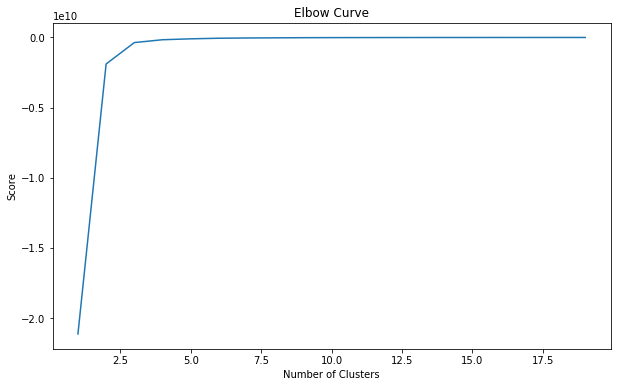

In [75]:
data = X[['date_delta','Packets','Flows','anomalous']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i,n_jobs=5).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [76]:
X_1 = data
X_1 = X_1.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X_1)
km.predict(X_1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [77]:
data

,date_delta,Packets,Flows,anomalous
0,9.375000e-07,1,1,0
1,1.157407e-08,1,1,0
2,0.000000e+00,2,1,0
3,9.259259e-07,2,1,0
4,1.157407e-08,1,1,0
...,...,...,...,...
99995,2.686191e-01,1,1,0
99996,2.686199e-01,1,1,0
99997,2.686188e-01,1,1,0
99998,2.686217e-01,1,1,0


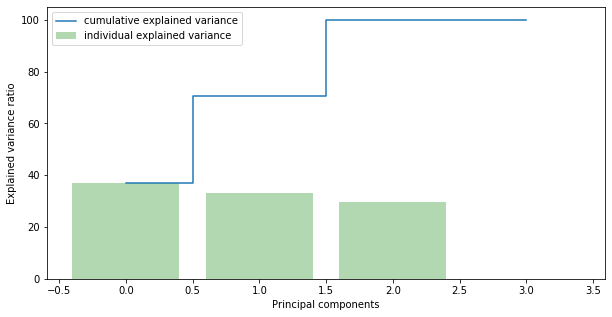

In [78]:
X_2 = data.values
X_std = StandardScaler().fit_transform(X_2)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [79]:
train_normal = X[X['anomalous']==0] 
train_outliers = X[X['anomalous']==1] 
outliers_fraction = len(train_outliers) / len(train_normal) 


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


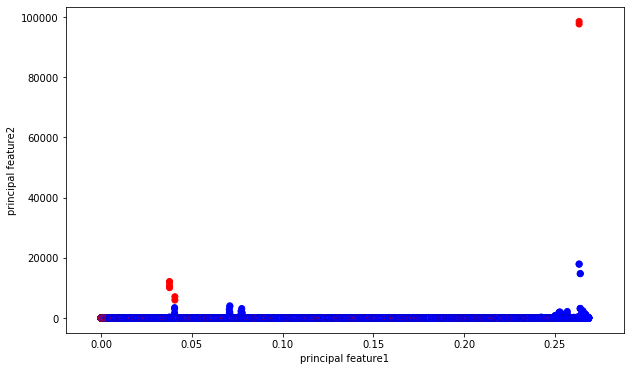

In [80]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

#outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[4])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
X['anomaly1'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(X['date_delta'], X['Packets'], c=X["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

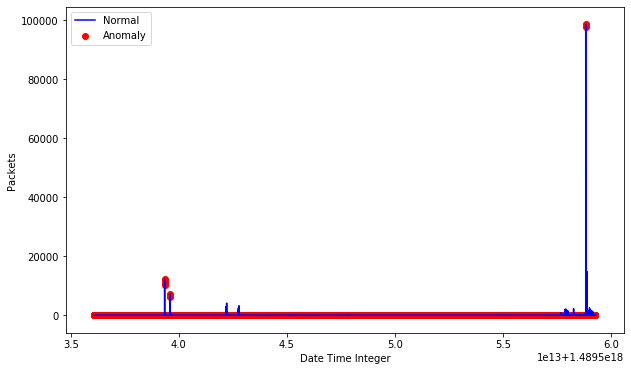

In [90]:
X = X.sort_values('Date first seen')
X['date_time_int'] = X[['Date first seen']].astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a = X.loc[X['anomaly1'] == 1, ['date_time_int', 'Packets']] #anomaly
ax.plot(X['date_time_int'], X['Packets'], color='blue', label='Normal')
ax.scatter(a['date_time_int'],a['Packets'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('Packets')
plt.legend()
plt.show();

In [93]:
X

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,anomalous,date_delta,anomaly1,date_time_int
2,2017-03-15 00:01:16.551,0.004,48888,445.0,2,1,0,0,0.000000e+00,0,1489536076551000000
1,2017-03-15 00:01:16.552,0.000,445,48888.0,1,1,0,0,1.157407e-08,1,1489536076552000000
4,2017-03-15 00:01:16.552,0.000,445,48888.0,1,1,0,0,1.157407e-08,1,1489536076552000000
3,2017-03-15 00:01:16.631,0.004,58844,445.0,2,1,0,0,9.259259e-07,0,1489536076631000000
5,2017-03-15 00:01:16.631,0.004,58844,445.0,2,1,0,0,9.259259e-07,0,1489536076631000000
...,...,...,...,...,...,...,...,...,...,...,...
99998,2017-03-15 06:28:05.468,0.000,60331,80.0,1,1,0,0,2.686217e-01,0,1489559285468000000
99979,2017-03-15 06:28:05.491,0.000,80,60331.0,1,1,0,0,2.686220e-01,0,1489559285491000000
99982,2017-03-15 06:28:05.514,0.000,443,59512.0,1,1,32,0,2.686223e-01,0,1489559285514000000
99983,2017-03-15 06:28:05.528,0.000,443,53628.0,1,1,32,0,2.686224e-01,0,1489559285528000000


In [94]:
c = np.where(X['anomalous'] == X['anomaly1'], True, False)

In [98]:
unique, counts = np.unique(c, return_counts=True)
dict(zip(unique, counts))

{False: 637, True: 99363}